# Analyse du rendement : principes fondamentaux du risque et du rendement

## Importation de la base de données

In [12]:
import pandas as pd
import numpy as np
prices =pd.read_csv('C:/Users/Visiteur/Documents/Mooc coursera Gestion de portefeuille 1/Données/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


## Calcul du rendement

In [13]:
returns = prices.pct_change() #Calcul des rendements
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


## Graphique du rendement

<AxesSubplot:>

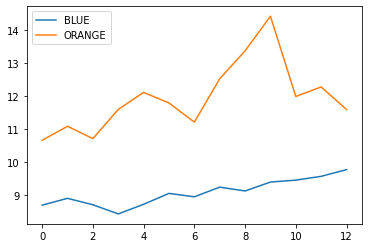

In [14]:
prices.plot()  #Graphique des rendements

In [15]:
%matplotlib inline #afficher automatiquement les graphiques générés par matplotlib directement dans le notebook.

UsageError: unrecognized arguments: #afficher automatiquement les graphiques générés par matplotlib directement dans le notebook.


<AxesSubplot:>

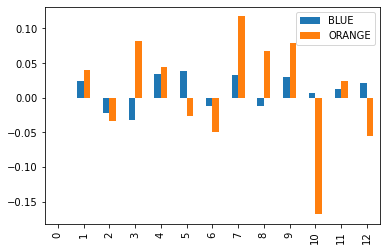

In [16]:
returns.plot.bar()

## Afficher les premières lignes

In [17]:
returns.head()  

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544


## Calcul des écarts types

In [18]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

## Calcul de la moyenne

In [19]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [20]:
returns+1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


## Calcul du produit des éléments

In [21]:
np.prod(returns+1) 

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [22]:
np.prod(returns+1)-1 #calcule le rendement total cumulé en pourcentage 

BLUE      0.123310
ORANGE    0.087167
dtype: float64

## le rendement cumulé total en pourcentage, arrondi à 2 décimales.

In [23]:
(((returns+1).prod()-1)*100).round(2) 

BLUE      12.33
ORANGE     8.72
dtype: float64

# Annualisation

## session de laboratoire rendement ajusté

In [24]:
import pandas as pd
prcies = pd.read_csv('C:/Users/Visiteur/Documents/Mooc coursera Gestion de portefeuille 1/Données/sample_prices.csv')
prices
returns =prices.pct_change()#calcul des redements  
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


## Supprimer les valeurs manquantes 

In [25]:
returns =returns.dropna() 
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [26]:
returns.std() #calcul du risque

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [27]:
deviations =returns - returns.mean()
squared_deviations =deviations**2
variance = squared_deviations.mean()
import numpy as np
volatility =np.sqrt(variance)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [28]:
returns.shape #nombre de lignes et le nombre de colonnes

(12, 2)

In [29]:
number_of_obs = returns.shape[0] #Accède au premier élément du tuple, donc le nombre de lignes.
variance = squared_deviations.sum()/(number_of_obs-1)
volatility = variance**0.5
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [30]:
returns.std()*np.sqrt(12) #Annualiser la volatilité

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [31]:
returns_1= pd.read_csv("C:/Users/Visiteur/Documents/Mooc coursera Gestion de portefeuille 1/Données/Portfolios_Formed_on_ME_monthly_EW.csv",
                       header=0, index_col=0, parse_dates=True,na_values=-99.99
                      ) # header Utilise la première ligne du fichier CSV comme noms de colonnes
# index_col Utilise la première colonne du fichier comme index (souvent les dates dans les séries temporelles).
# parse_dates Essaie de convertir automatiquement l’index en format datetime si ce sont des dates
#na_valuesTraite la valeur -99.99 comme un "manquant
returns_1

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


In [32]:
colsums = ['Lo 10', 'Hi 10'] #définis une liste contenant deux noms de colonnes 
returns_1 =returns_1[colsums] #Tu filtre le DataFrame returns_1 pour ne garder que les colonnes 
returns_1.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [33]:
returns_1 =returns_1/100 #pour avoir des valeurs brutes 
returns_1

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270
...,...,...
201808,0.0241,0.0234
201809,-0.0168,0.0087
201810,-0.1002,-0.0657
201811,-0.0365,0.0253


In [34]:
returns_1.columns =['smallCap', 'LargeCap'] #renommes les colonnes du DataFrame returns_1
returns_1.head()

,smallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<AxesSubplot:>

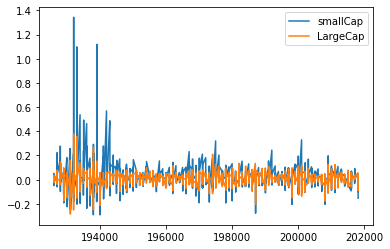

In [35]:
returns_1.plot()

In [36]:
%matplotlib inline

In [37]:
returns_1.std()

smallCap    0.106288
LargeCap    0.053900
dtype: float64

In [38]:
annualized_vol=returns_1.std()*np.sqrt(12)
annualized_vol

smallCap    0.368193
LargeCap    0.186716
dtype: float64

In [39]:
n_months = returns_1.shape[0]
returns_1_per_month =(returns_1 +1).prod()**(1/n_months)-1#RENDEMENTS EN MOIS
returns_1_per_month


smallCap    0.012986
LargeCap    0.007423
dtype: float64

In [40]:
annualized_return = (returns_1_per_month+1)**12 - 1 #ANNUALISATION
annualized_return

smallCap    0.167463
LargeCap    0.092810
dtype: float64

## Ratio de sharpe

In [41]:
ratio_sharpe = annualized_return/annualized_vol
ratio_sharpe

smallCap    0.454825
LargeCap    0.497063
dtype: float64

In [42]:
riskfree_rate= 0.03 #TAUX SANS RISQUE 
excess_return = (annualized_return-riskfree_rate) 
ratio_sharpe = excess_return/annualized_vol
ratio_sharpe #LE Rendement des actions est superieur au rendement sans risque

smallCap    0.373346
LargeCap    0.336392
dtype: float64

# Computer drawdown

<AxesSubplot:>

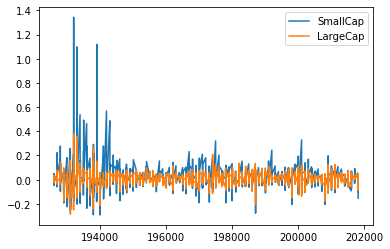

In [43]:
me_m = pd.read_csv('C:/Users/Visiteur/Documents/Mooc coursera Gestion de portefeuille 1/Données/Portfolios_Formed_on_ME_monthly_EW.csv',
                  header=0, index_col=0, parse_dates=True, na_values=-99.99)
me_m
rets =me_m[['Lo 10', 'Hi 10']] #les 10% les plus bas et les 10% les plus hauts
rets.columns =['SmallCap', 'LargeCap']
rets=rets/100
rets.plot.line()


In [44]:
rets.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [45]:
rets.index #est un attribut qui renvoie l’index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [46]:
rets.index = pd.to_datetime(rets.index, format="%Y%m") #Convertir l’index du DataFrame rets en dates interprétables par Pandas, au format année + mois (ex. "192607" → 1926-07-01).
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [47]:
rets.index =rets.index.to_period('M') #juste le mois
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [48]:
rets["1975"] #definir l'année de départ

<ipython-input-48-ae06e3b10cf6>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  rets["1975"] #definir l'année de départ


,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


In [49]:
rets.info() #La méthode .info() sur un DataFrame résume sa structure.

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


# compute drawdomns
1. Compute a wealth index
2.Compute previous peaks
3. Compute drawdown - whcih is the wealth value as a percentage of the previous peak

In [50]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod() #Calculer l’évolution d’un capital de 1000 € investi dans les grandes capitalisations (LargeCap) au fil du temps, en réinvestissant les gains chaque mois (c’est un indice de richesse cumulée).

In [51]:
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

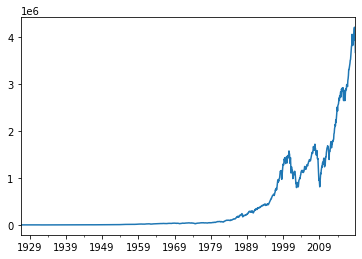

In [52]:
wealth_index.plot.line()

In [53]:
previous_peaks =wealth_index.cummax() #Identifier le plus haut niveau (maximum) atteint jusqu’à chaque point dans le temps par l’investissement

<AxesSubplot:>

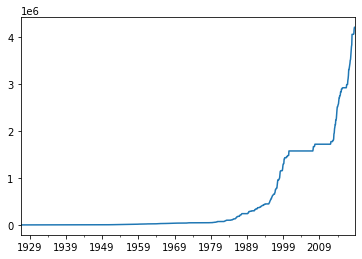

In [54]:
previous_peaks.plot()

<AxesSubplot:>

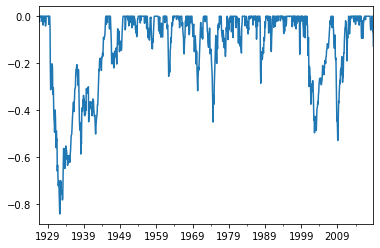

In [55]:
drawdown =(wealth_index - previous_peaks)/previous_peaks #Calculer le drawdown, c’est-à-dire la perte relative depuis le dernier sommet (pic) atteint.
drawdown.plot()

In [56]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [57]:
drawdown.min()

-0.8400375277943123

In [58]:
drawdown["1975":].idxmin() #Trouver la date à laquelle le portefeuille a atteint son drawdown le plus profond (la plus forte perte relative depuis un sommet) à partir de 1975.

Period('2009-02', 'M')

In [61]:
drawdown.idxmin()

Period('1932-05', 'M')

In [62]:
def drawdown(return_series: pd.Series): 
    """
    Prend une série temporelle de rendements d’un actif
    Calcule et renvoie un DataFrame contenant :
        - l’indice de richesse (wealth index)
        - les pics précédents (previous peaks)
        - les drawdowns en pourcentage
    """
    wealth_index = 1000 * (1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    return pd.DataFrame({
        "wealth": wealth_index,
        "peaks": previous_peaks,
        "drawdown": drawdowns
    })


In [63]:
drawdown(rets["LargeCap"]).head()

,wealth,peaks,drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [64]:
drawdown(rets["LargeCap"])[["wealth", "peaks"]].head()

,wealth,peaks
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


<AxesSubplot:>

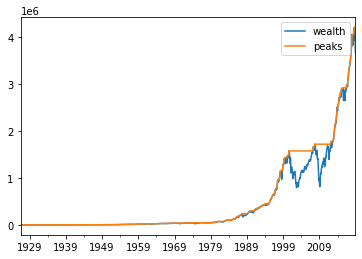

In [65]:
drawdown(rets["LargeCap"])[["wealth", "peaks"]].plot()

<AxesSubplot:>

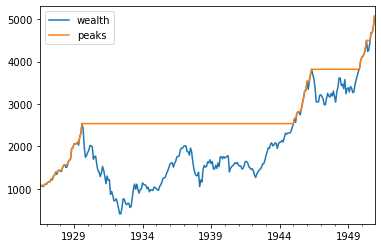

In [66]:
drawdown(rets[:"1950"]["LargeCap"])[["wealth", "peaks"]].plot() #filtre les données jusqu’à l’année 1950 incluse 

In [121]:
drawdown(rets["LargeCap"])["drawdown"].min() #Elle cherche à calculer la plus grande perte relative (drawdown minimum) subie par un portefeuille investi dans LargeCap (grandes capitalisations), c’est-à-dire la pire chute depuis un sommet historique.

-0.8400375277943123

# Section 2 :Beyond the Gaussian Case: Estimating Extreme Risks

# The Gaussian Asumption

## Standard simpliflying Asumption

In [ ]:
#Asset returns are normaly distributed

### Skewness

In [127]:
#Skewness( related to  the 3 center moment) is a mesure of asymetry of the distribution around its mean : A negative skew suggests a higher chance of large losses. A positive skew suggests a higher chance of large gains.


$$
S(R) = \frac{\mathbb{E}[(R - \mathbb{E}[R])^3]}{\sigma(R)^3}
$$




### Kurtosis

In [ ]:
#The kurtosis is related to  the fourth center moment K(R) = E[R -E(R)]^4/sigma(R). The Kurtosis is equal to three. Any return distribution that has a kutosis higher than threewe call that a fat tail distribution


$$
K(R) = \frac{\mathbb{E}[(R - \mathbb{E}[R])^4]}{\sigma(R)^4}
$$

### Jarque-Bera Test 

In [ ]:
#The Jarque-Bera (JB) test is a normality test that checks whether a dataset follows a normal distribution based on:Skewness (asymmetry) and Kurtosis (tail heaviness)
#H₀ (Null Hypothesis): The data follows a normal distribution
#H₁ (Alternative Hypothesis): The data does not follow a normal distribution
#Clearly if you look at the skewness is negative, the kurtosis is much higher than three we are not looking at the gaussian distribution
#So conclusion, well wrap-up most asset returns are not normally distributed assuming that they are normallly distributed comes with a big cost

$$
JB=n(S^2+(K−3)^2/4)/6
$$

## Downside Rosk measures

In [ ]:
# semi-deviation is the volatility of thr sub-sample of below-average or below-zero returns
#Semi-deviation is a measure of downside risk. Unlike standard deviation, which treats positive and negative returns equally, semi-deviation focuses only on negative returns (returns that fall below a target or mean), making it more relevant for investors who are particularly averse to losses.
#What really bothers investors is when there's uncertainty or volatility on the downside

$$
sigma(semi) = racine{[Somme(Rt -E(Rt))^2]/N}
$$

### VAR

In [ ]:
#VAR represents the maximum expected loss over a given time period
#Var definition maximum potential loss Threshold. At a spcified confidence level 99%

## Devaitions from Normality

In [67]:
hfi = pd.read_csv('C:/Users/Visiteur/Documents/Mooc coursera Gestion de portefeuille 1/Données/edhec-hedgefundindices.csv', 
                  header =0, index_col=0, parse_dates =True, na_values=-99.99)
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01-31,1.19,3.93,1.78,7.91,1.89,2.13,1.91,5.73,2.81,1.50,1.80,-1.66,3.17
1997-02-28,1.23,2.98,1.22,5.25,1.01,0.84,1.22,1.75,-0.06,0.34,1.18,4.26,1.06
1997-03-31,0.78,-0.21,-0.12,-1.20,0.16,-0.23,1.09,-1.19,-0.84,0.60,0.10,7.78,-0.77
1997-04-30,0.86,-1.70,0.30,1.19,1.19,-0.05,1.30,1.72,0.84,-0.01,1.22,-1.29,0.09
1997-05-31,1.56,-0.15,2.33,3.15,1.89,3.46,1.18,1.08,3.94,1.97,1.73,-7.37,2.75


In [68]:
pd.concat([hfi.mean(), hfi.median(), hfi.mean()>hfi.median()], axis="columns")

,0,1,2
Convertible Arbitrage,0.550837,0.65,False
CTA Global,0.407376,0.14,True
Distressed Securities,0.694601,0.89,False
Emerging Markets,0.625323,0.96,False
Equity Market Neutral,0.449810,0.51,False
Event Driven,0.634449,0.84,False
Fixed Income Arbitrage,0.436502,0.55,False
Global Macro,0.540304,0.38,True
Long/Short Equity,0.633080,0.79,False
Merger Arbitrage,0.535589,0.60,False


### Skewness

In [69]:
from scipy.stats import skew
skewness_df =pd.DataFrame(skew(hfi), index=hfi.columns, columns=["Skewness"])
skewness_df


,Skewness
Convertible Arbitrage,-2.639592
CTA Global,0.173699
Distressed Securities,-1.300842
Emerging Markets,-1.167067
Equity Market Neutral,-2.124435
Event Driven,-1.409154
Fixed Income Arbitrage,-3.940320
Global Macro,0.982922
Long/Short Equity,-0.390227
Merger Arbitrage,-1.320083


In [70]:
hfi.shape

(263, 13)

### Kurtosis

In [71]:
from scipy.stats import kurtosis
kurtosis =hfi.kurt()
kurtosis

Convertible Arbitrage     20.694912
CTA Global                -0.024781
Distressed Securities      5.007403
Emerging Markets           6.394438
Equity Market Neutral     14.515783
Event Driven               5.156059
Fixed Income Arbitrage    27.382747
Global Macro               2.817691
Long/Short Equity          1.576431
Merger Arbitrage           5.872733
Relative Value             9.320184
Short Selling              3.201032
Funds Of Funds             4.171770
dtype: float64

### Jarque-Bera

#### Since the p-value is 0.0 (much less than common significance levels like 5% or 1%), we strongly reject the null hypothesis. Therefore, the data are not normally distributed

In [72]:
from scipy.stats import jarque_bera
# Supposons que hfi est un DataFrame ou une série pandas avec les rendements
result = jarque_bera(hfi)  # ou jarque_bera(hfi) si c'est une série
result


Jarque_beraResult(statistic=25656.585999171326, pvalue=0.0)

## Estimating VaR

In [ ]:
#There are at least four standard methods for Calculing VaR
#Method 1 : Histotical(Non parametric)
#Method 2: Varinace-Covariance(Parametric-Gaussian)
#Method 3: Parametric non Gaussian
#Method 4: Cornish-Fisher(Semi Parametric)

## Downside 

### semi-deviation

In [73]:
hfi.std(ddof=0)

Convertible Arbitrage     1.653593
CTA Global                2.329015
Distressed Securities     1.700922
Emerging Markets          3.247559
Equity Market Neutral     0.811480
Event Driven              1.671168
Fixed Income Arbitrage    1.151700
Global Macro              1.469404
Long/Short Equity         1.989693
Merger Arbitrage          0.960047
Relative Value            1.146198
Short Selling             4.765495
Funds Of Funds            1.553616
dtype: float64

In [74]:
hfi[hfi<0].std(ddof=0) #downside volatility

Convertible Arbitrage     1.953984
CTA Global                1.244280
Distressed Securities     1.518528
Emerging Markets          2.803858
Equity Market Neutral     0.956603
Event Driven              1.542914
Fixed Income Arbitrage    1.776280
Global Macro              0.657942
Long/Short Equity         1.405097
Merger Arbitrage          0.887489
Relative Value            1.224417
Short Selling             2.728324
Funds Of Funds            1.212215
dtype: float64

### VaR and CVaR

Value At Risk

-Historic VaR

-Parametric VaR - Gaussian

-Modified Cornish-Fisher VaR

#### Historic VaR

In [75]:
np.percentile(hfi, 5, axis=0) #There is a 5% probability that the return will be less than or equal to -2.74%

array([-1.576, -3.169, -1.966, -4.247, -0.814, -2.535, -0.787, -1.499,
       -2.598, -1.047, -1.174, -6.783, -2.047])

In [76]:
def var_historic(r, level=5): 
    """
    VaR historic
    """
    if isinstance(r, pd.DataFrame): 
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else : 
        raise TypeError("Excepected r to be Series or DataFrame")

In [77]:
var_historic(hfi)

Convertible Arbitrage     1.576
CTA Global                3.169
Distressed Securities     1.966
Emerging Markets          4.247
Equity Market Neutral     0.814
Event Driven              2.535
Fixed Income Arbitrage    0.787
Global Macro              1.499
Long/Short Equity         2.598
Merger Arbitrage          1.047
Relative Value            1.174
Short Selling             6.783
Funds Of Funds            2.047
dtype: float64

#### Parametric VaR - Gaussian
This formula calculates the parametric Value at Risk (VaR) assuming returns are normally distributed.
It represents the maximum expected loss with a given probability (e.g., 5%).

In [78]:
from scipy.stats import norm #This imports the normal distribution object from the scipy.stats module. It allows you to work with statistical functions related to the Gaussian (normal) distribution.

In [79]:
z = norm.ppf(.05) #eturns the quantile (z-score) such that the cumulative probability up to that point is 5%.

In [80]:
hfi.mean() + z*hfi.std(ddof=0)

Convertible Arbitrage    -2.169082
CTA Global               -3.423512
Distressed Securities    -2.103167
Emerging Markets         -4.716437
Equity Market Neutral    -0.884956
Event Driven             -2.114377
Fixed Income Arbitrage   -1.457877
Global Macro             -1.876650
Long/Short Equity        -2.639673
Merger Arbitrage         -1.043547
Relative Value           -1.306126
Short Selling            -8.008618
Funds Of Funds           -2.129236
dtype: float64

#### -Modified Cornish-Fisher VaR

In [81]:
del skew
del kurtosis
from scipy.stats import skew, kurtosis
def var_gaussian(r, level=5, modified=False):
    """
    Reurns the Parametric Gaussian VaR of a Series or DataFrame
    If "modified" is True, then the modified VaR is returned,
    using the Cornish-Fisher modification
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    if modified:
        # modify the Z score based on observed skewness and kurtosis
        s = skew(r)
        k = kurtosis(r)
        z = (z+
            (z**2 - 1)*s/6 +
            (z**3 -3*z)*(k-3)/24-
            (2*z**3 - 5*z)*(s**2)/36
            )
    return -(r.mean() +z*r.std(ddof=0))
            
            

<AxesSubplot:title={'center':'EDHEC Hedge Fund Indices : VaR'}>

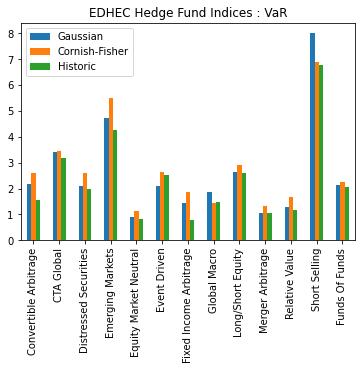

In [82]:
var_list = [var_gaussian(hfi), var_gaussian(hfi, modified =True), var_historic(hfi)]
comparison =pd.concat(var_list, axis=1)
comparison.columns =["Gaussian", "Cornish-Fisher", "Historic"]
comparison.plot.bar(title ="EDHEC Hedge Fund Indices : VaR")

### BeyondVaR aka CVaR
VaR (Conditional Value at Risk), also known as Expected Shortfall, is the average loss expected in the worst-case scenarios, beyond a given confidence level (typically 95% or 99%).

In [83]:
def cvar_historic(r, level=5):
    """
    Computes the Conditional VaR of Series or DataFrame
    """
    if isinstance(r, pd.Series):
        is_beyond = r <= -var_historic(r, level=level)
        return -r[is_beyond].mean()
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_historic, level=level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")

In [84]:
cvar_historic(hfi) #CVaR at 5% represents the average loss in the worst 5% of cases.

Convertible Arbitrage     3.655000
CTA Global                4.126429
Distressed Securities     3.642857
Emerging Markets          7.236429
Equity Market Neutral     1.687857
Event Driven              3.833571
Fixed Income Arbitrage    2.825714
Global Macro              2.062857
Long/Short Equity         4.194286
Merger Arbitrage          1.914286
Relative Value            2.465000
Short Selling             9.682143
Funds Of Funds            3.320714
dtype: float64

# Module 2 Section 1 : Introduction à l'optimisation du Portefeuille de la frontière efficiente

$$
rendement  d'un  portefeuille  composé  de  deux  actifs
 R(W_A, W_B) = W_A*R_a + W_B*R_b
$$

$$
sigma^2(W_a, W_b) =sigma_A^2*W_A^2 + sigma_B^2*W_B^2 +2W_AW_Bsigma_Bsigma_Bcorrelation_AB
$$

# Efficient Frontier

In [85]:
ind =pd.read_csv('C:/Users/Visiteur/Documents/Mooc coursera Gestion de portefeuille 1/Données/ind30_m_vw_rets.csv', header=0, index_col=0, parse_dates=True)/100

In [86]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [87]:
ind.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [88]:
ind.index =pd.to_datetime(ind.index, format="%Y%m").to_period('M')

In [89]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [90]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [91]:
ind["Food "].shape

(1110,)

In [92]:
ind.columns =ind.columns.str.strip()
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [93]:
ind.shape

(1110, 30)

In [94]:
def get_ind_returns():
    """
    Load and format the ken French 30 Industry portefolios Value Weigthed Monthly Returns
    """
    ind= pd.read_csv('C:/Users/Visiteur/Documents/Mooc coursera Gestion de portefeuille 1/Données/ind30_m_vw_rets.csv', header=0, index_col=0, parse_dates=True)/100
    ind.columns= ind.columns.str.strip()
    return ind

In [95]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


<AxesSubplot:title={'center':'Drawdown - Food Industry'}>

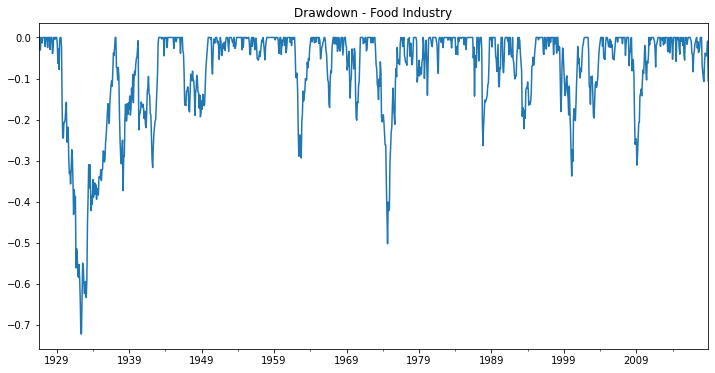

In [96]:
def drawdown(return_series : pd.Series):
    """"
    Calcule les drawdowns pour une série de rendements.
    Return: un DataFrame avec Wealth Index, Previous Peaks et Drawdown.
    """
    wealth_index =(1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown" :drawdowns
    })
drawdown(ind["Food"])["Drawdown"].plot(figsize=(12,6), title ="Drawdown - Food Industry")

In [97]:
cols_of_interest =["Food", "Smoke", "Coal", "Beer", "Fin"]
var_list = var_gaussian(ind[cols_of_interest], modified =True)
var_list

Food     0.064071
Smoke    0.083807
Coal     0.053891
Beer     0.038229
Fin      0.079301
dtype: float64

In [98]:
var_liste =var_gaussian(ind, modified=True).sort_values().tail() #Ta ligne de code est correcte pour calculer la Value at Risk (VaR) en utilisant la méthode Gaussienne modifiée de Cornish-Fisher, pour toutes les colonnes (industries) d’un DataFrame ind, et pour extraire les 5 industries les plus risquées (celles avec les VaR les plus grandes en valeur absolue).
var_liste

Carry    0.099108
Meals    0.102316
BusEq    0.103463
Games    0.106097
Mines    0.107190
dtype: float64

In [99]:
var_liste =var_gaussian(ind, modified=True).sort_values().head() #renvoie les 5 industries ayant la Value at Risk (VaR) modifiée (Cornish-Fisher) la plus faible 
var_liste

Beer     0.038229
Coal     0.053891
Food     0.064071
Telcm    0.067497
Hshld    0.068396
dtype: float64

<AxesSubplot:>

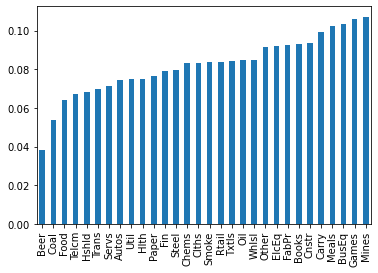

In [100]:
var_gaussian(ind, modified=True).sort_values().plot.bar()

In [107]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

In [108]:
def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)

In [109]:
def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Calcule le ratio de Sharpe annualisé à partir d'une série de rendements.
    r : DataFrame ou Series de rendements périodiques (mensuels, hebdomadaires, etc.)
    riskfree_rate : taux sans risque annualisé (ex. : 0.03 pour 3%)
    periods_per_year : nombre de périodes par an (12 pour mensuel, 252 pour journalier)
    """

    # Convertit le taux sans risque annualisé en taux par période
    rf_per_period = (1 + riskfree_rate)**(1 / periods_per_year) - 1

    # Calcule les rendements en excès : rendements du portefeuille - taux sans risque
    excess_ret = r - rf_per_period

    # Calcule le rendement annualisé des rendements en excès
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)

    # Calcule la volatilité annualisée des rendements
    ann_vol = annualize_vol(r, periods_per_year)

    # Retourne le ratio de Sharpe = rendement excédentaire annualisé / volatilité annualisée
    return ann_ex_ret / ann_vol

    

<AxesSubplot:title={'center':'Industry sharpe Ratios 1926-2018'}>

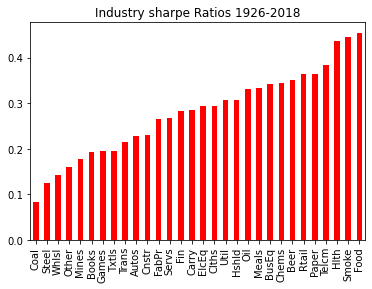

In [110]:
sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="Industry sharpe Ratios 1926-2018", color="red") #risk-free rate=3%

<AxesSubplot:title={'center':'Industry sharpe Ratios 2000-2018'}>

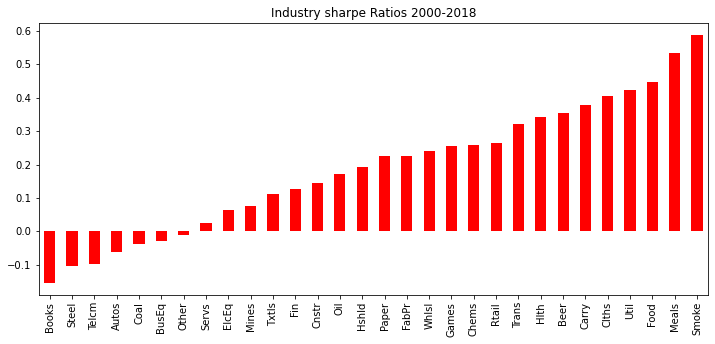

In [111]:
sharpe_ratio(ind["2000":], 0.03, 12).sort_values().plot.bar(title="Industry sharpe Ratios 2000-2018", figsize=(12,5), color="red")

In [112]:
rts_annual =annualize_rets(ind["1996":"2000"],12) #calculer les rendements annualisés de chaque portefeuille de l’indice 

<AxesSubplot:>

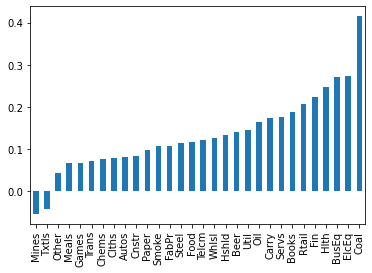

In [113]:
rts_annual.sort_values().plot.bar()

In [114]:
cov = ind["1996":"2000"].cov()

In [115]:
cov.shape

(30, 30)

In [116]:
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002609,0.002379,0.002061,0.000846,0.001035,0.001374,0.001733,0.001230,0.001414,0.001216,...,0.000667,0.000237,-0.000315,0.001429,0.001534,0.000740,0.001363,0.001230,0.002132,0.001057
Beer,0.002379,0.005264,0.001359,0.001348,0.000865,0.002804,0.001704,0.001955,0.001460,0.002005,...,0.001146,0.000438,0.000007,0.001710,0.002284,0.000697,0.001690,0.001822,0.002571,0.001383
Smoke,0.002061,0.001359,0.008349,0.000379,-0.000128,0.001167,0.000950,0.001038,0.000853,0.000779,...,0.000062,-0.000218,-0.000120,0.001327,0.000396,0.001707,0.000105,0.000703,0.001312,0.001741
Games,0.000846,0.001348,0.000379,0.003773,0.001726,0.001206,0.002189,0.001433,0.001775,0.001422,...,0.001922,0.002848,0.003434,0.001852,0.001578,0.001966,0.001872,0.001561,0.002416,0.002382
Books,0.001035,0.000865,-0.000128,0.001726,0.002612,0.001025,0.002361,0.000758,0.001731,0.001459,...,0.001918,0.002367,0.001944,0.001638,0.001776,0.001392,0.002223,0.001189,0.002261,0.001442
Hshld,0.001374,0.002804,0.001167,0.001206,0.001025,0.003300,0.001320,0.001473,0.001413,0.001364,...,0.001060,0.001310,0.001102,0.001873,0.001582,0.000683,0.001378,0.001202,0.001912,0.001580
Clths,0.001733,0.001704,0.000950,0.002189,0.002361,0.001320,0.005655,0.000834,0.002932,0.002472,...,0.001436,0.001625,0.000834,0.003165,0.002862,0.001934,0.003013,0.002721,0.003210,0.002299
Hlth,0.001230,0.001955,0.001038,0.001433,0.000758,0.001473,0.000834,0.002565,0.000474,0.000608,...,0.001204,0.001651,0.001535,0.000650,0.000944,0.001056,0.000869,0.000986,0.001617,0.001258
Chems,0.001414,0.001460,0.000853,0.001775,0.001731,0.001413,0.002932,0.000474,0.003276,0.001868,...,0.001004,0.001203,0.001031,0.002920,0.002196,0.001404,0.001808,0.001646,0.002469,0.002059
Txtls,0.001216,0.002005,0.000779,0.001422,0.001459,0.001364,0.002472,0.000608,0.001868,0.003117,...,0.000907,0.000666,0.000702,0.002058,0.001929,0.001610,0.001805,0.001250,0.001986,0.001811


## Optimisation de markovitz et frontière efficiente
La frontière efficiente est l’ensemble des portefeuilles optimaux qui offrent :

    le rendement espéré maximal pour un niveau de risque donné, ou

    le risque minimal pour un niveau de rendement espéré donné.

Elle est représentée par une courbe convexe dans l’espace rendement-risque (volatilité).

## Applying quadprog to draw the efficient frontier

## Efficient Frontier Part II

In [117]:
# Fonction qui calcule le rendement d'un portefeuille donné les poids et les rendements attendus
def portofolio_return(weights, returns):
    """
    Calcule le rendement espéré d'un portefeuille
    weights : vecteur des poids du portefeuille (numpy array)
    returns : vecteur des rendements espérés des actifs (numpy array)
    """
    return weights.T @ returns  # Produit scalaire entre les poids et les rendements espérés

# Fonction qui calcule la volatilité (écart-type) d'un portefeuille
def portofolio_vol(weights, covmat):
    """
    Calcule la volatilité (écart-type) d'un portefeuille
    weights : vecteur des poids du portefeuille (numpy array)
    covmat : matrice de covariance des rendements des actifs (numpy array)
    """
    return (weights.T @ covmat @ weights)**0.5  # Formule de la volatilité d’un portefeuille : √(wᵀΣw)


In [118]:
l =["Food", "Beer", "Smoke", "Coal"]
rts_annual[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [119]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [120]:
weights =np.repeat(1/4, 4)
weights

array([0.25, 0.25, 0.25, 0.25])

In [121]:
portofolio_return(weights, rts_annual[l]) #Calcule le rendement moyen annualisé d'un portefeuille pondéré

0.19511097196038385

### 2 Asset Frontier

In [122]:
l =["Games", "Fin"]

In [123]:
n_points =20 ## Définit le nombre de points à générer le long de la frontière efficiente (20 portefeuilles à tester)
weights =[np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)] ## Génère une liste de vecteurs de poids (pour 2 actifs), où chaque vecteur représente une combinaison différente
# des deux actifs avec des poids allant de 0 à 1 (ex : [0.0, 1.0], [0.05, 0.95], ..., [1.0, 0.0])
# np.linspace(0, 1, n_points) crée 20 valeurs également espacées entre 0 et 1
# Pour chaque valeur w, on crée un poids [w, 1-w] tel que la somme des poids soit toujours 1
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [124]:
len(weights)

20

In [125]:
l

['Games', 'Fin']

<AxesSubplot:xlabel='Volatility'>

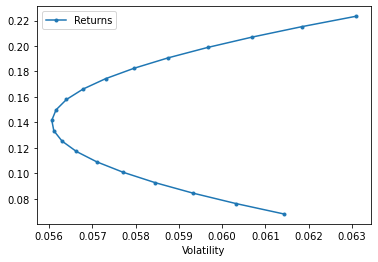

In [126]:
# Calcule le rendement attendu de chaque portefeuille généré précédemment (à partir des poids)
# pour les actifs listés dans 'l', en utilisant les rendements annualisés.
rets = [portofolio_return(w, rts_annual[l]) for w in weights]

# Calcule la volatilité (écart-type annualisé) de chaque portefeuille basé sur la matrice de covariance des actifs dans 'l'.
vols = [portofolio_vol(w, cov.loc[l, l]) for w in weights]

# Crée un DataFrame contenant les rendements et les volatilités de chaque portefeuille.
ef = pd.DataFrame({"Returns": rets, "Volatility": vols})

# Trace la frontière efficiente sous forme d'un nuage de points (scatter plot),
# avec la volatilité en abscisse (x) et le rendement en ordonnée (y).
ef.plot.line(x="Volatility", y="Returns", style=".-")



In [135]:
rets

[0.22337143343356036,
 0.21520512368930153,
 0.20703881394504264,
 0.19887250420078378,
 0.19070619445652492,
 0.18253988471226607,
 0.17437357496800718,
 0.16620726522374832,
 0.15804095547948946,
 0.14987464573523063,
 0.14170833599097174,
 0.13354202624671288,
 0.12537571650245402,
 0.11720940675819516,
 0.1090430970139363,
 0.10087678726967743,
 0.09271047752541857,
 0.08454416778115972,
 0.07637785803690085,
 0.06821154829264198]

## Asset Efficienty Frontier

In [ ]:
def plot_ef1(n_points, er, cov, style=".-"):
    """
    Plots the N-asset efficient frontier
    """
    if er.sharpe[0] != 2 or er.sharpe[0] !=2:
        raise ValueError("plot_ef2 can only plot 2_asset frontiers")
        weights =[np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
        rets =[portofolio_return(w, er) for w in weights]
        vols =[portofolio_vol(w, cov) for w in weights]
        ef = pd.DataFrame({
            "Returns": rets,
            "volatility": vols
        })
        return ef.plot.line(x="volatility", y="Returns", style=style)

In [128]:
from scipy.optimize import minimize

In [131]:
from scipy.optimize import minimize

def minimize_vol(target_return, rets, cov):
    """
    Returns the optimal weights that achieve the target return
    given a set of expected returns and a covariance matrix
    """
    n = rets.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    return_is_target = {'type': 'eq',
                        'args': (rets,),
                        'fun': lambda weights, rets: target_return - portfolio_return(weights,rets)
    }
    weights = minimize(portfolio_vol, init_guess,
                       args=(cov,), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,return_is_target),
                       bounds=bounds)
    return weights.x

In [140]:
l = ["Games", "Fin"]
l

['Games', 'Fin']

## Theorème de séparatrion des fonds et ligne de marché des capitaux

In [ ]:
# the efficient frontier dramatically changes shape when a risk-free asset is introduced

In [ ]:
#the tangency portfolio is the portfolio that maximizes the sharpe ratio

In [ ]:
# In the presence of a risk-Free asset the efficient frontier becomes a straight line the capital market line

In [ ]:
# All investors should hold a combination of the risk-free asset and the portfolio that maximizes the Reward-per-risk ratio 